In [140]:
import numpy as np # библиотека для работы с многомерными массивами и математическими функциями
import pandas as pd # библиотека для анализа и обработки данных
import matplotlib.pyplot as plt # библиотека для построения графиков
from matplotlib import gridspec # библиотека для построения осей координат
from sklearn.cluster import OPTICS, cluster_optics_dbscan # библиотека реализующая OPTICS-алгоритм
from sklearn.preprocessing import normalize, StandardScaler # библиотека для нормализации данных
np.seterr(divide='ignore', invalid='ignore') # отключение предупреждений

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [141]:
X = pd.read_csv('Data.csv') # считываем данные из файла

""" удаляем нерелевантные столбцы """
drop_features = ['status_id', 'status_type', 'status_published', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4']
X = X.drop(drop_features, axis = 1)

X.head() # выводим начало полученных данных

,num_reactions,num_comments,num_shares,num_likes
0,529,512,262,432
1,150,0,0,150
2,227,236,57,204
3,111,0,0,111
4,213,0,0,204


In [142]:
scaler = StandardScaler() # инициализируем объект стандартизации
X_scaled = scaler.fit_transform(X) # изучаем данные
X_normalized = normalize(X_scaled) # нормализуем данные так, чтобы они были примерны Гауссовскому распределению
X_normalized = pd.DataFrame(X_normalized) # конвертируем numpy массив в pandas DataFrame 
X_normalized.columns = X.columns # переименовываем столбцы
X_normalized.head() # выводим начало полученных данных

,num_reactions,num_comments,num_shares,num_likes
0,0.340499,0.170407,0.888990,0.254398
1,-0.380617,-0.554264,-0.668407,-0.318046
2,-0.050988,0.099043,0.976230,-0.185919
3,-0.490135,-0.480060,-0.578921,-0.440637
4,-0.093065,-0.634324,-0.764953,-0.061798


In [143]:
""" строим модель кластеризации OPTICS-алгоритма """
#optics_model = OPTICS(min_samples = 13, xi = 0.0185, min_cluster_size = 0.0255)
#optics_model = OPTICS(min_samples = 8, xi = 0.01, min_cluster_size = 0.01)
optics_model = OPTICS(min_samples = 5, xi = 0.05, min_cluster_size = 0.05)
#optics_model = OPTICS(min_samples = 3, xi = 0.09, min_cluster_size = 0.09)
#optics_model = OPTICS(min_samples = 3, xi = 0.07, min_cluster_size = 0.07)

optics_model.fit(X_normalized) # тренируем модель на данных

OPTICS(min_cluster_size=0.05)

In [144]:
space = np.arange(len(X_normalized)) # создаем массив для хранения чисел
reachability = optics_model.reachability_[optics_model.ordering_] # сохраняем расстрояние достижимости каждой точки
labels = optics_model.labels_[optics_model.ordering_] # сохраняем метки кластера каждой точки
np.savetxt('myfile.csv', labels, delimiter=',') # записываем в файл метки кластера каждой точки

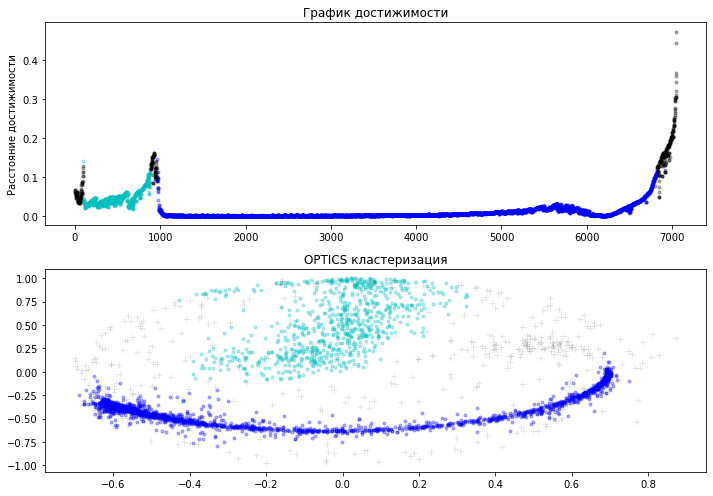

In [145]:
plt.figure(figsize =(10, 7)) # инициализируем объект, который будет отрисовываться
G = gridspec.GridSpec(2, 1) # определяем количество строк и столбцов объекта
ax1 = plt.subplot(G[0, :]) # определяем первый рисунок
ax2 = plt.subplot(G[1, 0]) # определяем второй рисунок
  
""" построение графика достижимости-расстояния """
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] # массив цветов
for Class, colour in zip(range(0, 5), colors): # циклы по кластерам, который отрисовывает куски графика
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.set_ylabel('Расстояние достижимости')
ax1.set_title('График достижимости')
  
""" построение графика кластеризации """
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] # массив цветов
for Class, colour in zip(range(0, 5), colors): # циклы по кластерам, который отрисовывает куски графика
    Xk = X_normalized[optics_model.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
      
ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0],
        X_normalized.iloc[optics_model.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS кластеризация')

plt.tight_layout() # отступ между графиками
plt.show() # показываем график